# Librerías:

Instalamos el paquete  "fuzzy" :

In [ ]:
pip install scikit-fuzzy -qq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 11.3 MB/s eta 0:00:00


Importamos todas las librerías necesarias:

In [ ]:
import pandas as pd
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
import math

# Aplicamos la idea del paper: (Fuzzy TOPSIS-  Technique for Order Preference by Similarity to Ideal Solution)

Creamos un df con los datos de distintos países:

In [ ]:
data = {
    'Country': [ 'Denmark', 'Austria', 'Ireland', 'France', 'Finland', 'The Netherlands', 'Luxembourg', 'Germany', 'United Kingdom',
        'Belgium', 'Sweden', 'Italy', 'Cyprus', 'Estonia', 'Slovenia', 'Latvia', 'Spain', 'Lithuania', 'Slovakia',
        'Croatia', 'Portugal', 'Hungary', 'Poland', 'Bulgaria', 'Romania', 'Switzerland'],

    'Cost_of_Living_Index': [72.3, 65.1, 64.4, 63.7, 63.2, 63.1, 62.4, 62.2, 62.0, 61.1, 59.3, 56.2, 54.7, 52.0, 49.9, 49.1, 47.3,  47.1, 46.7, 45.5, 45.1, 41.7, 40.8, 38.3, 37.5, 101.1 ],
    'Adjusted_Quality_of_Life_Ranking': [2, 8, 10, 12, 3, 5, 11, 6, 9, 7, 1, 15, 24, 21, 23, 26, 13, 25, 22, 17, 14, 18, 16, 20, 19, 4 ],
    'Adjusted_Adventure_Ranking': [12, 8, 6, 4, 11, 7, 18, 17, 15, 14, 9, 1, 10, 23, 22, 25, 2, 26, 24, 13, 3, 20, 16, 21, 19, 5 ],
    'Adjusted_Heritage_Ranking': [ 12, 7, 6, 3, 19, 10, 21, 8, 5, 15, 16, 1, 18, 24, 23, 25, 2, 26, 22, 14, 4, 13, 11, 20, 17, 9 ],
    'Average_Travel_Cost_EUR': [380, 135, 292.5, 255, 522.5, 287.5, 427.5, 337.5, 150, 190, 252.5, 132.5, 107.5, 300, 257.5, 297.5, 195, 240, 147.5, 225, 400, 107.5, 165, 140, 132.5, 220 ],
    'Travel_Time_h': [ 3.42, 2.17, 6.67, 3.58, 3.83, 3.5, 3.08, 3.0, 3.92, 3.42, 5.5, 2.17, 1.58, 7.0, 6.0, 6.5, 3.92, 5.0,  2.25, 5.92, 4.5, 2.17, 2.67, 1.5, 1.5, 2.8],
    'Safety_Index': [73.7, 70.7, 53.5, 44.7, 73.7, 73.7, 65.6, 61.1, 52.6, 50.8, 51.6, 52.7, 67.6, 76.2, 75.8, 62.6, 63.8, 67.2, 68.9, 74.0, 68.8, 66.3, 69.3, 62.9, 66.3, 73.5 ]
}

df = pd.DataFrame(data)

In [ ]:
df # (Tabla 1)

,Country,Cost_of_Living_Index,Adjusted_Quality_of_Life_Ranking,Adjusted_Adventure_Ranking,Adjusted_Heritage_Ranking,Average_Travel_Cost_EUR,Travel_Time_h,Safety_Index
0,Denmark,72.3,2,12,12,380.0,3.42,73.7
1,Austria,65.1,8,8,7,135.0,2.17,70.7
2,Ireland,64.4,10,6,6,292.5,6.67,53.5
3,France,63.7,12,4,3,255.0,3.58,44.7
4,Finland,63.2,3,11,19,522.5,3.83,73.7
5,The Netherlands,63.1,5,7,10,287.5,3.50,73.7
6,Luxembourg,62.4,11,18,21,427.5,3.08,65.6
7,Germany,62.2,6,17,8,337.5,3.00,61.1
8,United Kingdom,62.0,9,15,5,150.0,3.92,52.6
9,Belgium,61.1,7,14,15,190.0,3.42,50.8


Creamos los distintos fuzzy sets:

Usamos cuartetos (a, b, c, d) ya que en el paper se manejan funciones de pertenencia trapezoidales para representar los valores lingüísticos.

Estas funciones se usarán para fuzzificar los valores en la matriz de decisión.



In [ ]:
# Fuzzy sets específicos para cada criterio (Tabla 2)

fuzzy_criteria_sets = {
    "Cost_of_Living_Index": {
        "VL": (0, 0, 20, 30),
        "L":  (20, 30, 40, 50),
        "M":  (40, 50, 60, 70),
        "H":  (60, 70, 85, 100),
        "VH": (85, 100, 120, 120)
    },
    "Adjusted_Quality_of_Life_Ranking": {
        "VH": (0, 0, 3, 5),
        "H":  (3, 5, 8, 10),
        "M":  (8, 10, 14, 17),
        "L":  (14, 17, 20, 23),
        "VL": (20, 23, 26, 26)
    },
    "Adjusted_Adventure_Ranking": {
        "VH": (0, 0, 3, 5),
        "H":  (3, 5, 8, 10),
        "M":  (8, 10, 14, 17),
        "L":  (14, 17, 20, 23),
        "VL": (20, 23, 26, 26)
    },
    "Adjusted_Heritage_Ranking": {
        "VH": (0, 0, 3, 5),
        "H":  (3, 5, 8, 10),
        "M":  (8, 10, 14, 17),
        "L":  (14, 17, 20, 23),
        "VL": (20, 23, 26, 26)
    },
    "Average_Travel_Cost_EUR": {
        "VL": (0, 0, 50, 100),
        "L":  (50, 100, 130, 170),
        "M":  (150, 200, 250, 300),
        "H":  (280, 300, 350, 380),
        "VH": (350, 450, 600, 600)
    },
    "Travel_Time_h": {
        "VL": (0, 0, 1, 1.3),
        "L":  (1, 1.3, 1.5, 2),
        "M":  (1.5, 2, 3, 3.5),
        "H":  (3, 3.5, 4, 5),
        "VH": (4, 5, 8,8)
    },
    "Safety_Index": {
        "VL": (0, 0, 10, 20),
        "L":  (10, 20, 30, 40),
        "M":  (30, 40, 60, 70),
        "H":  (60, 70, 80, 90),
        "VH": (80, 90, 100, 100)
    }
}

Graficamos:

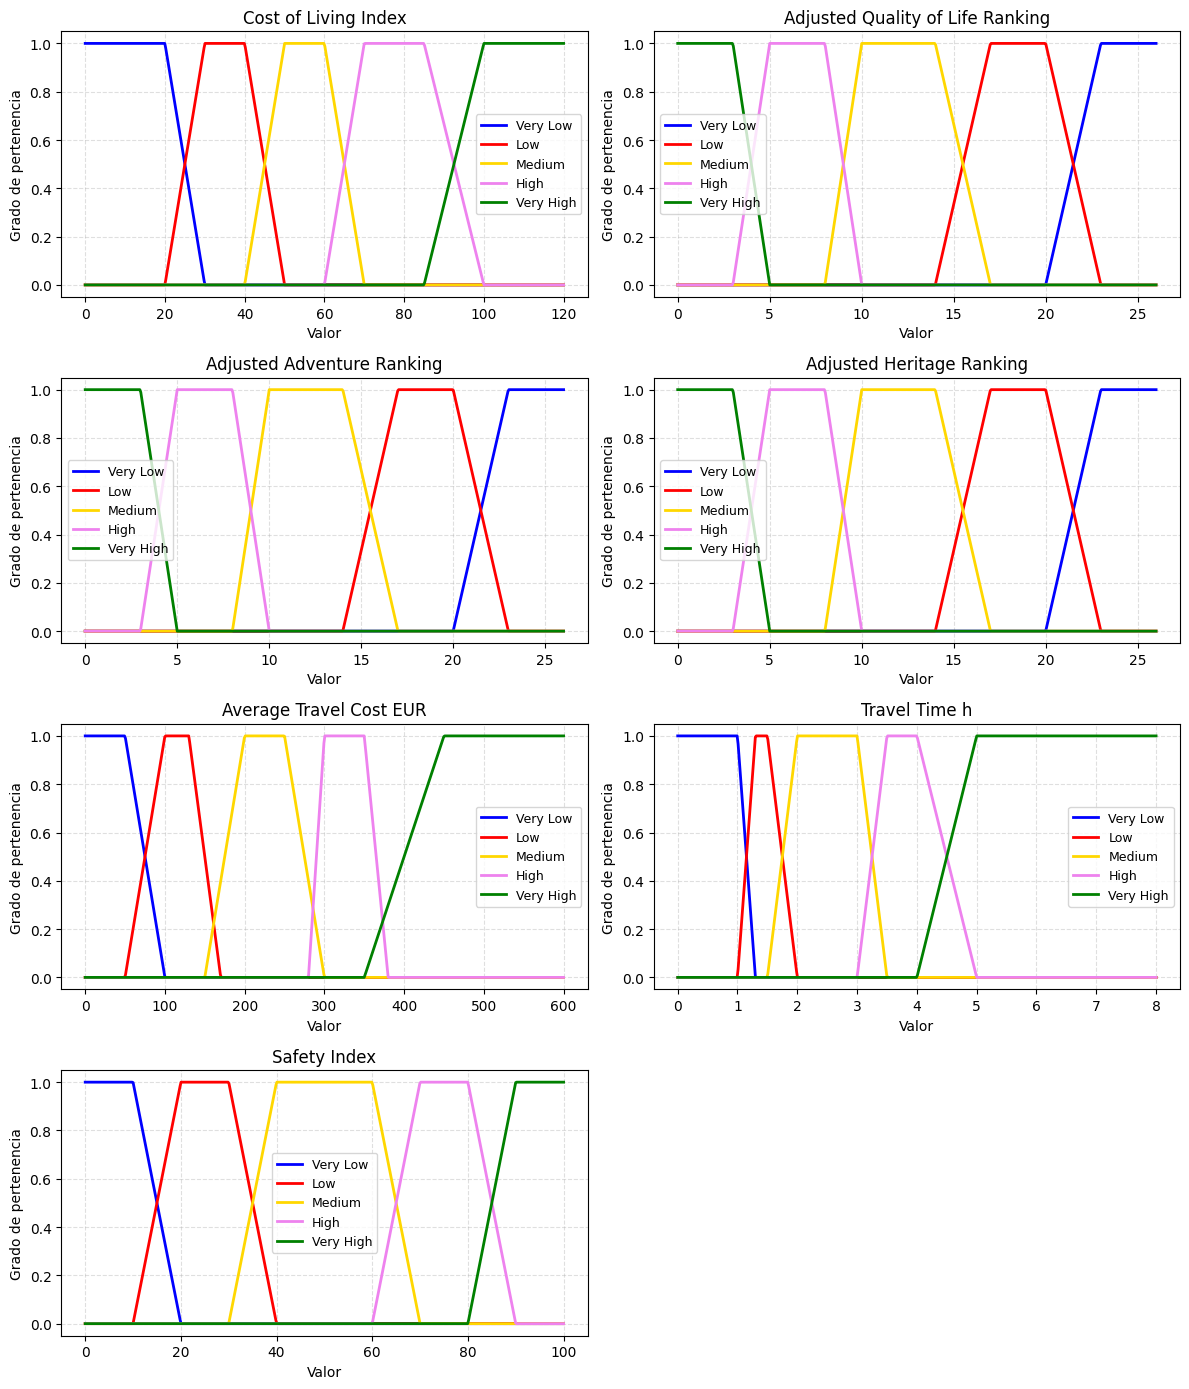

In [ ]:
# Colores y mapeo legible
colors    = ['blue', 'red', 'gold', 'violet', 'green']
label_map = {'VL': 'Very Low', 'L': 'Low', 'M': 'Medium', 'H': 'High', 'VH': 'Very High'}

# Configurar cuadrícula 4x2
fig, axes = plt.subplots(4, 2, figsize=(12, 14))
axes = axes.flatten()

for ax, (criterion, sets) in zip(axes, fuzzy_criteria_sets.items()):
    # Universo para este criterio
    a_vals   = [v[0] for v in sets.values()]
    d_vals   = [v[3] for v in sets.values()]
    universe = np.linspace(min(a_vals), max(d_vals), 500)

    # Decide orden de dibujo: invertido para los "Adjusted"
    keys = list(sets.keys())
    if criterion.startswith("Adjusted_"):
        keys = keys[::-1]  # de VH→VL
    # En criterio normal se mantiene VL→VH

    # Dibuja cada trapecio en orden
    for key, color in zip(keys, colors):
        params = sets[key]
        label  = label_map[key]
        mf     = fuzz.trapmf(universe, params)
        ax.plot(universe, mf, color=color, label=label, linewidth=2)

    ax.set_title(criterion.replace('_', ' '), fontsize=12)
    ax.set_xlabel('Valor')
    ax.set_ylabel('Grado de pertenencia')
    ax.set_ylim(-0.05, 1.05)
    ax.grid(True, linestyle='--', alpha=0.4)
    # Asegura que la leyenda muestre en el mismo orden que se dibujó
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels, loc='best', fontsize=9)

# Apaga el último subplot sobrante
if len(fuzzy_criteria_sets) < len(axes):
    axes[len(fuzzy_criteria_sets)].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# Diccionario de conjuntos difusos para calificaciones (Tabla 3)
fuzzy_ratings = {
    "VL": (1, 1, 3),
    "L":  (1, 3, 5),
    "M":  (3, 5, 7),
    "H":  (5, 7, 10),
    "VH": (7, 10, 10)
}

# Diccionario de conjuntos difusos para pesos (Tabla 4)
fuzzy_weights = {
    "None": (0, 0, 0),
    "VL":   (1, 1, 30),
    "L":    (1, 30, 50),
    "M":    (30, 50, 70),
    "H":    (50, 70, 100),
    "VH":   (70, 100, 100)
}

**PASO 1:** Convertir los valores precisos (crisp) de los criterios en valores difusos.
Fueron calculados teniendo en cuenta los conjuntos difusos definidos anteriormente.

In [ ]:
def get_linguistic_labels_fuzzy(value, fuzzy_set, threshold=1e-6):
    labels = []
    for label, (a, b, c, d) in fuzzy_set.items():
        # Calcula la membresía exacta en value
        μ = fuzz.trapmf(np.array([value]), np.array([a, b, c, d]))[0]
        if μ > threshold:
            labels.append(label)
    return " & ".join(labels) if labels else "None"

# Aplica a tu DataFrame
linguistic_df = pd.DataFrame()
linguistic_df["Country"] = df["Country"]
for col, fset in fuzzy_criteria_sets.items():
    linguistic_df[col] = df[col].apply(lambda x: get_linguistic_labels_fuzzy(x, fset))

print(linguistic_df.to_string(index=False))

        Country Cost_of_Living_Index Adjusted_Quality_of_Life_Ranking Adjusted_Adventure_Ranking Adjusted_Heritage_Ranking Average_Travel_Cost_EUR Travel_Time_h Safety_Index
        Denmark                    H                               VH                          M                         M                      VH         M & H            H
        Austria                M & H                                H                          H                         H                       L             M            H
        Ireland                M & H                                M                          H                         H                   M & H            VH            M
         France                M & H                                M                     VH & H                        VH                       M             H            M
        Finland                M & H                               VH                          M                         L        

In [ ]:
linguistic_df

,Country,Cost_of_Living_Index,Adjusted_Quality_of_Life_Ranking,Adjusted_Adventure_Ranking,Adjusted_Heritage_Ranking,Average_Travel_Cost_EUR,Travel_Time_h,Safety_Index
0,Denmark,H,VH,M,M,VH,M & H,H
1,Austria,M & H,H,H,H,L,M,H
2,Ireland,M & H,M,H,H,M & H,VH,M
3,France,M & H,M,VH & H,VH,M,H,M
4,Finland,M & H,VH,M,L,VH,H,H
5,The Netherlands,M & H,H,H,M,M & H,H,H
6,Luxembourg,M & H,M,L,L & VL,VH,M & H,M & H
7,Germany,M & H,H,L,H,H,M,M & H
8,United Kingdom,M & H,H & M,M & L,H,L,H,M
9,Belgium,M & H,H,M,M & L,M,M & H,M


Dibujemos el caso de Portugal, cómo se acitvan esas funciones:

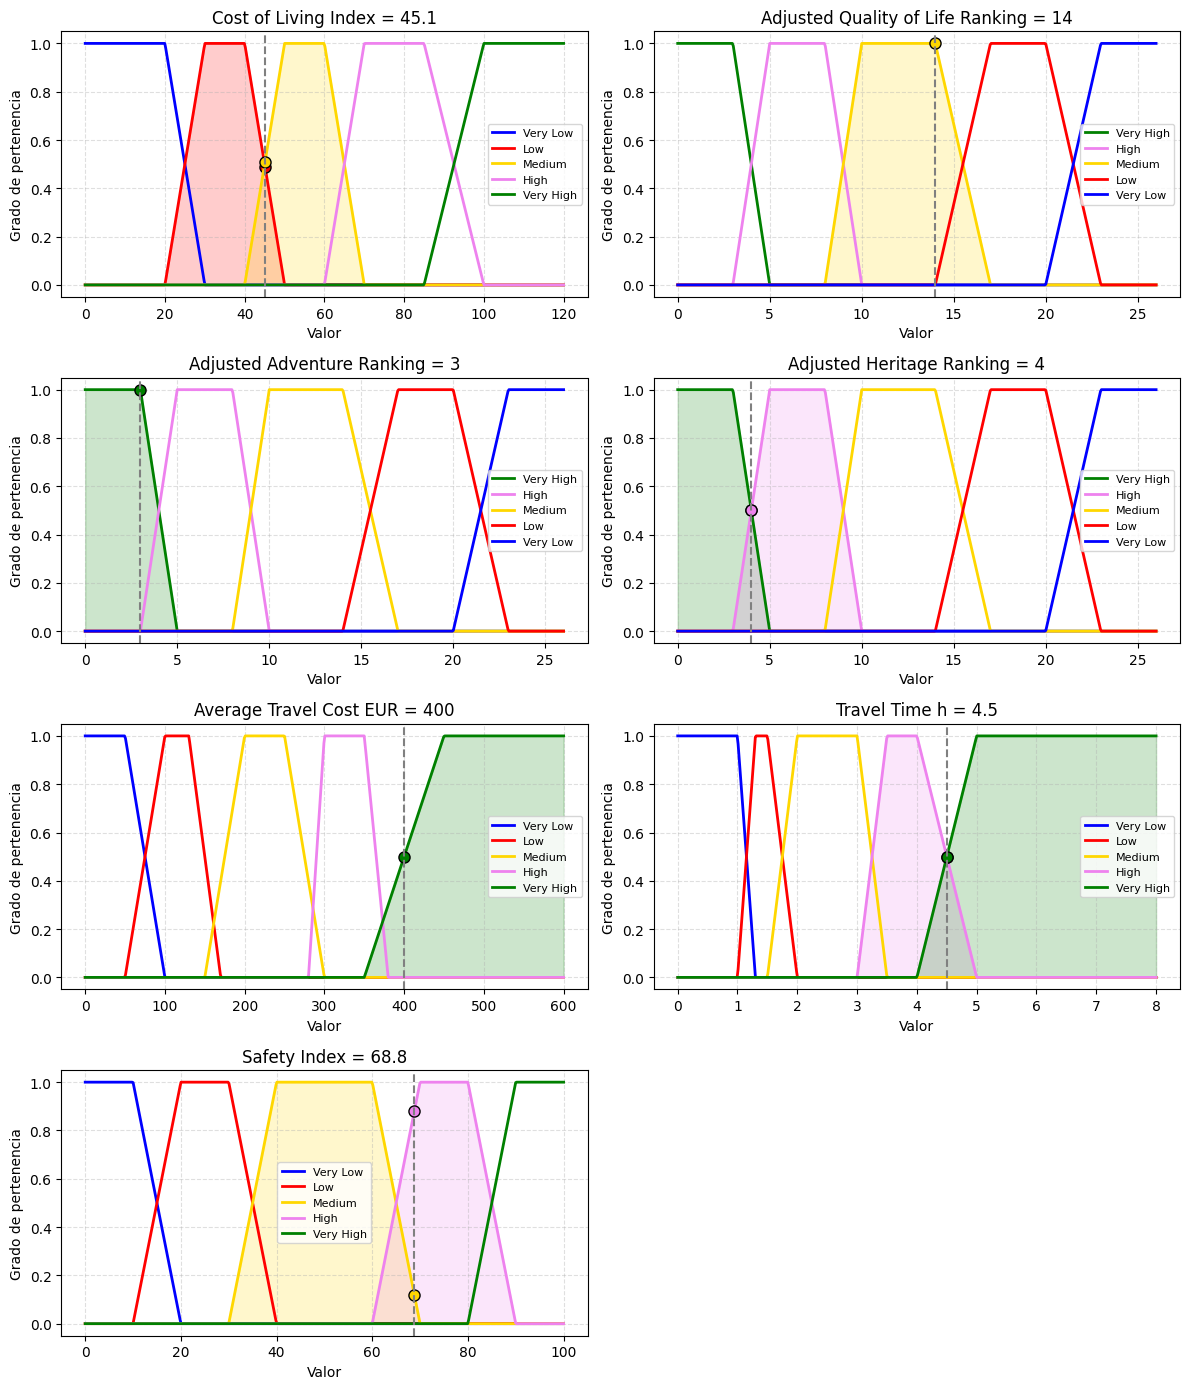

In [ ]:
# Valores de Portugal
portugal_values = {
    "Cost_of_Living_Index": 45.1,
    "Adjusted_Quality_of_Life_Ranking": 14,
    "Adjusted_Adventure_Ranking": 3,
    "Adjusted_Heritage_Ranking": 4,
    "Average_Travel_Cost_EUR": 400,
    "Travel_Time_h": 4.5,
    "Safety_Index": 68.8
}

label_map = {'VL':'Very Low','L':'Low','M':'Medium','H':'High','VH':'Very High'}
colors    = {'VL':'blue','L':'red','M':'gold','H':'violet','VH':'green'}

fig, axes = plt.subplots(4, 2, figsize=(12, 14))
axes = axes.flatten()

for ax, (crit, sets) in zip(axes, fuzzy_criteria_sets.items()):
    # Universo de discurso
    a_vals = [v[0] for v in sets.values()]
    d_vals = [v[3] for v in sets.values()]
    x = np.linspace(min(a_vals), max(d_vals), 500)
    xv = portugal_values[crit]

    for key, params in sets.items():
        # calcula trapmf
        y = fuzz.trapmf(x, params)
        ax.plot(x, y, color=colors[key], label=label_map[key], linewidth=2)

        # calcula membresía exacta en xv
        μ = fuzz.trapmf(np.array([xv]), np.array(params))[0]

        # si μ>0 rellena área activa
        if μ > 0:
            mask = y > 0
            ax.fill_between(x[mask], y[mask], color=colors[key], alpha=0.2)

            # marca el punto siempre, pero solo si la membresía es mayor que 0
            ax.plot(xv, μ, 'o', color=colors[key], markersize=8, markeredgecolor='k')

    # línea guía vertical
    ax.axvline(xv, linestyle='--', color='gray')
    ax.set_title(f"{crit.replace('_', ' ')} = {xv}")
    ax.set_ylim(-0.05, 1.05)
    ax.grid(True, linestyle='--', alpha=0.4)
    ax.legend(loc='best', fontsize=8)
    ax.set_xlabel('Valor')
    ax.set_ylabel('Grado de pertenencia')

# apaga sobrante
if len(fuzzy_criteria_sets) < len(axes):
    axes[len(fuzzy_criteria_sets)].axis('off')

plt.tight_layout()
plt.show()

**PASO 2:** Reemplazamos los términos lingüísticos de las celdas de la Tabla anterior con un conjunto de tres números (a, b, c), que representan la partición de cada conjunto difuso.
Esto se realiza utilizando los conjuntos difusos de valoración (Tabla 3).
La matriz producida D se llama matriz de decisión difusa.

In [ ]:
def etiquetas_a_tripleta(etiquetas):
    """
    Convierte etiquetas lingüísticas a una lista de tripletas fuzzy, según fuzzy_ratings.
    Si hay varias etiquetas (ej. 'M & H'), se devuelve una lista con ambas tripletas.
    """
    if pd.isna(etiquetas) or etiquetas.strip() == "":
        return []

    terms = [et.strip() for et in etiquetas.split('&')]
    triplets = [fuzzy_ratings.get(et, None) for et in terms]
    triplets = [t for t in triplets if t is not None]

    return triplets

In [ ]:
for col in linguistic_df.columns[1:]:  # Omitimos la columna 'Country'
    linguistic_df[col] = linguistic_df[col].apply(etiquetas_a_tripleta)

In [ ]:
linguistic_df

,Country,Cost_of_Living_Index,Adjusted_Quality_of_Life_Ranking,Adjusted_Adventure_Ranking,Adjusted_Heritage_Ranking,Average_Travel_Cost_EUR,Travel_Time_h,Safety_Index
0,Denmark,"[(5, 7, 10)]","[(7, 10, 10)]","[(3, 5, 7)]","[(3, 5, 7)]","[(7, 10, 10)]","[(3, 5, 7), (5, 7, 10)]","[(5, 7, 10)]"
1,Austria,"[(3, 5, 7), (5, 7, 10)]","[(5, 7, 10)]","[(5, 7, 10)]","[(5, 7, 10)]","[(1, 3, 5)]","[(3, 5, 7)]","[(5, 7, 10)]"
2,Ireland,"[(3, 5, 7), (5, 7, 10)]","[(3, 5, 7)]","[(5, 7, 10)]","[(5, 7, 10)]","[(3, 5, 7), (5, 7, 10)]","[(7, 10, 10)]","[(3, 5, 7)]"
3,France,"[(3, 5, 7), (5, 7, 10)]","[(3, 5, 7)]","[(7, 10, 10), (5, 7, 10)]","[(7, 10, 10)]","[(3, 5, 7)]","[(5, 7, 10)]","[(3, 5, 7)]"
4,Finland,"[(3, 5, 7), (5, 7, 10)]","[(7, 10, 10)]","[(3, 5, 7)]","[(1, 3, 5)]","[(7, 10, 10)]","[(5, 7, 10)]","[(5, 7, 10)]"
5,The Netherlands,"[(3, 5, 7), (5, 7, 10)]","[(5, 7, 10)]","[(5, 7, 10)]","[(3, 5, 7)]","[(3, 5, 7), (5, 7, 10)]","[(5, 7, 10)]","[(5, 7, 10)]"
6,Luxembourg,"[(3, 5, 7), (5, 7, 10)]","[(3, 5, 7)]","[(1, 3, 5)]","[(1, 3, 5), (1, 1, 3)]","[(7, 10, 10)]","[(3, 5, 7), (5, 7, 10)]","[(3, 5, 7), (5, 7, 10)]"
7,Germany,"[(3, 5, 7), (5, 7, 10)]","[(5, 7, 10)]","[(1, 3, 5)]","[(5, 7, 10)]","[(5, 7, 10)]","[(3, 5, 7)]","[(3, 5, 7), (5, 7, 10)]"
8,United Kingdom,"[(3, 5, 7), (5, 7, 10)]","[(5, 7, 10), (3, 5, 7)]","[(3, 5, 7), (1, 3, 5)]","[(5, 7, 10)]","[(1, 3, 5)]","[(5, 7, 10)]","[(3, 5, 7)]"
9,Belgium,"[(3, 5, 7), (5, 7, 10)]","[(5, 7, 10)]","[(3, 5, 7)]","[(3, 5, 7), (1, 3, 5)]","[(3, 5, 7)]","[(3, 5, 7), (5, 7, 10)]","[(3, 5, 7)]"


In [ ]:
linguistic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Country                           26 non-null     object
 1   Cost_of_Living_Index              26 non-null     object
 2   Adjusted_Quality_of_Life_Ranking  26 non-null     object
 3   Adjusted_Adventure_Ranking        26 non-null     object
 4   Adjusted_Heritage_Ranking         26 non-null     object
 5   Average_Travel_Cost_EUR           26 non-null     object
 6   Travel_Time_h                     26 non-null     object
 7   Safety_Index                      26 non-null     object
dtypes: object(8)
memory usage: 1.8+ KB


In [ ]:
linguistic_df.applymap(type)

<ipython-input-15-b8fd4a32a5b0>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  linguistic_df.applymap(type)


,Country,Cost_of_Living_Index,Adjusted_Quality_of_Life_Ranking,Adjusted_Adventure_Ranking,Adjusted_Heritage_Ranking,Average_Travel_Cost_EUR,Travel_Time_h,Safety_Index
0,<class 'str'>,<class 'list'>,<class 'list'>,<class 'list'>,<class 'list'>,<class 'list'>,<class 'list'>,<class 'list'>
1,<class 'str'>,<class 'list'>,<class 'list'>,<class 'list'>,<class 'list'>,<class 'list'>,<class 'list'>,<class 'list'>
2,<class 'str'>,<class 'list'>,<class 'list'>,<class 'list'>,<class 'list'>,<class 'list'>,<class 'list'>,<class 'list'>
3,<class 'str'>,<class 'list'>,<class 'list'>,<class 'list'>,<class 'list'>,<class 'list'>,<class 'list'>,<class 'list'>
4,<class 'str'>,<class 'list'>,<class 'list'>,<class 'list'>,<class 'list'>,<class 'list'>,<class 'list'>,<class 'list'>
5,<class 'str'>,<class 'list'>,<class 'list'>,<class 'list'>,<class 'list'>,<class 'list'>,<class 'list'>,<class 'list'>
6,<class 'str'>,<class 'list'>,<class 'list'>,<class 'list'>,<class 'list'>,<class 'list'>,<class 'list'>,<class 'list'>
7,<class 'str'>,<class 'list'>,<class 'list'>,<class 'list'>,<class 'list'>,<class 'list'>,<class 'list'>,<class 'list'>
8,<class 'str'>,<class 'list'>,<class 'list'>,<class 'list'>,<class 'list'>,<class 'list'>,<class 'list'>,<class 'list'>
9,<class 'str'>,<class 'list'>,<class 'list'>,<class 'list'>,<class 'list'>,<class 'list'>,<class 'list'>,<class 'list'>


**PASO 3:** Agregar (agrupar) las valoraciones difusas de la matriz de decisión difusa D usando

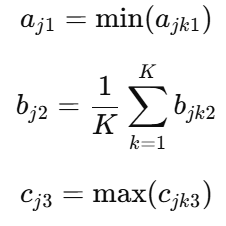

In [ ]:
def combinar_tripletas(tripletas):
    if isinstance(tripletas, list):
        if len(tripletas) == 1:
            return tripletas[0]
        elif len(tripletas) > 1:
            a_vals = [t[0] for t in tripletas]
            b_vals = [t[1] for t in tripletas]
            c_vals = [t[2] for t in tripletas]

            a = min(a_vals)
            b = sum(b_vals) / len(b_vals)
            c = max(c_vals)

            return (a, b, c)
    return tripletas  # En caso de celda vacía o error

In [ ]:
for col in linguistic_df.columns[1:]:  # Omitimos 'Country'
    linguistic_df[col] = linguistic_df[col].apply(combinar_tripletas)

In [ ]:
linguistic_df

,Country,Cost_of_Living_Index,Adjusted_Quality_of_Life_Ranking,Adjusted_Adventure_Ranking,Adjusted_Heritage_Ranking,Average_Travel_Cost_EUR,Travel_Time_h,Safety_Index
0,Denmark,"(5, 7, 10)","(7, 10, 10)","(3, 5, 7)","(3, 5, 7)","(7, 10, 10)","(3, 6.0, 10)","(5, 7, 10)"
1,Austria,"(3, 6.0, 10)","(5, 7, 10)","(5, 7, 10)","(5, 7, 10)","(1, 3, 5)","(3, 5, 7)","(5, 7, 10)"
2,Ireland,"(3, 6.0, 10)","(3, 5, 7)","(5, 7, 10)","(5, 7, 10)","(3, 6.0, 10)","(7, 10, 10)","(3, 5, 7)"
3,France,"(3, 6.0, 10)","(3, 5, 7)","(5, 8.5, 10)","(7, 10, 10)","(3, 5, 7)","(5, 7, 10)","(3, 5, 7)"
4,Finland,"(3, 6.0, 10)","(7, 10, 10)","(3, 5, 7)","(1, 3, 5)","(7, 10, 10)","(5, 7, 10)","(5, 7, 10)"
5,The Netherlands,"(3, 6.0, 10)","(5, 7, 10)","(5, 7, 10)","(3, 5, 7)","(3, 6.0, 10)","(5, 7, 10)","(5, 7, 10)"
6,Luxembourg,"(3, 6.0, 10)","(3, 5, 7)","(1, 3, 5)","(1, 2.0, 5)","(7, 10, 10)","(3, 6.0, 10)","(3, 6.0, 10)"
7,Germany,"(3, 6.0, 10)","(5, 7, 10)","(1, 3, 5)","(5, 7, 10)","(5, 7, 10)","(3, 5, 7)","(3, 6.0, 10)"
8,United Kingdom,"(3, 6.0, 10)","(3, 6.0, 10)","(1, 4.0, 7)","(5, 7, 10)","(1, 3, 5)","(5, 7, 10)","(3, 5, 7)"
9,Belgium,"(3, 6.0, 10)","(5, 7, 10)","(3, 5, 7)","(1, 4.0, 7)","(3, 5, 7)","(3, 6.0, 10)","(3, 5, 7)"


In [ ]:
linguistic_df.columns

Index(['Country', 'Cost_of_Living_Index', 'Adjusted_Quality_of_Life_Ranking',
       'Adjusted_Adventure_Ranking', 'Adjusted_Heritage_Ranking',
       'Average_Travel_Cost_EUR', 'Travel_Time_h', 'Safety_Index'],
      dtype='object')

**PASO 4:** Determinar qué criterios son de beneficio y cuáles son de coste.
Un criterio se considera de beneficio cuando valores más altos son mejores o más deseables.
Se considera de coste cuando valores más bajos son mejores o más deseables.
En este sistema, los criterios de beneficio son: Ranking ajustado de calidad de vida,Ranking ajustado de aventura, Ranking ajustado de patrimonio,Índice de seguridad

Los criterios de coste son: Índice del coste de vida, Coste medio del viaje, Tiempo de viaje

In [ ]:
benefit_criteria = [
    'Adjusted_Quality_of_Life_Ranking',
    'Adjusted_Adventure_Ranking',
    'Adjusted_Heritage_Ranking',
    'Safety_Index'
]

cost_criteria = [
    'Cost_of_Living_Index',
    'Average_Travel_Cost_EUR',
    'Travel_Time_h'
]

**PASO 5:** Normalizar la matriz de decisión difusa de las alternativas (Tabla A2 del Apéndice B), utilizando las fórmulas (2) y (3).
El resultado es la Tabla A3, la matriz de decisión difusa normalizada de las alternativas.

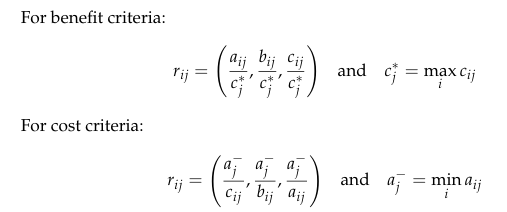

In [ ]:
def normalizar_tripletas(df, benefit_criteria, cost_criteria):
    df_normalizado = df.copy()

    for col in benefit_criteria:
        # c* = max_i c_ij
        c_star = max([t[2] for t in df[col] if isinstance(t, tuple)])

        def normalizar_benefit(t):
            if isinstance(t, tuple):
                a, b, c = t
                return (a / c_star, b / c_star, c / c_star)
            return t

        df_normalizado[col] = df[col].apply(normalizar_benefit)

    for col in cost_criteria:
        # a- = min_i a_ij
        a_minus = min([t[0] for t in df[col] if isinstance(t, tuple)])

        def normalizar_cost(t):
            if isinstance(t, tuple) and t[0] != 0 and t[1] != 0 and t[2] != 0:
                a, b, c = t
                return (a_minus / c, a_minus / b, a_minus / a)
            return t

        df_normalizado[col] = df[col].apply(normalizar_cost)

    return df_normalizado


In [ ]:
df_normalized = normalizar_tripletas(linguistic_df, benefit_criteria, cost_criteria)

df_normalized

,Country,Cost_of_Living_Index,Adjusted_Quality_of_Life_Ranking,Adjusted_Adventure_Ranking,Adjusted_Heritage_Ranking,Average_Travel_Cost_EUR,Travel_Time_h,Safety_Index
0,Denmark,"(0.1, 0.14285714285714285, 0.2)","(0.7, 1.0, 1.0)","(0.3, 0.5, 0.7)","(0.3, 0.5, 0.7)","(0.1, 0.1, 0.14285714285714285)","(0.1, 0.16666666666666666, 0.3333333333333333)","(0.5, 0.7, 1.0)"
1,Austria,"(0.1, 0.16666666666666666, 0.3333333333333333)","(0.5, 0.7, 1.0)","(0.5, 0.7, 1.0)","(0.5, 0.7, 1.0)","(0.2, 0.3333333333333333, 1.0)","(0.14285714285714285, 0.2, 0.3333333333333333)","(0.5, 0.7, 1.0)"
2,Ireland,"(0.1, 0.16666666666666666, 0.3333333333333333)","(0.3, 0.5, 0.7)","(0.5, 0.7, 1.0)","(0.5, 0.7, 1.0)","(0.1, 0.16666666666666666, 0.3333333333333333)","(0.1, 0.1, 0.14285714285714285)","(0.3, 0.5, 0.7)"
3,France,"(0.1, 0.16666666666666666, 0.3333333333333333)","(0.3, 0.5, 0.7)","(0.5, 0.85, 1.0)","(0.7, 1.0, 1.0)","(0.14285714285714285, 0.2, 0.3333333333333333)","(0.1, 0.14285714285714285, 0.2)","(0.3, 0.5, 0.7)"
4,Finland,"(0.1, 0.16666666666666666, 0.3333333333333333)","(0.7, 1.0, 1.0)","(0.3, 0.5, 0.7)","(0.1, 0.3, 0.5)","(0.1, 0.1, 0.14285714285714285)","(0.1, 0.14285714285714285, 0.2)","(0.5, 0.7, 1.0)"
5,The Netherlands,"(0.1, 0.16666666666666666, 0.3333333333333333)","(0.5, 0.7, 1.0)","(0.5, 0.7, 1.0)","(0.3, 0.5, 0.7)","(0.1, 0.16666666666666666, 0.3333333333333333)","(0.1, 0.14285714285714285, 0.2)","(0.5, 0.7, 1.0)"
6,Luxembourg,"(0.1, 0.16666666666666666, 0.3333333333333333)","(0.3, 0.5, 0.7)","(0.1, 0.3, 0.5)","(0.1, 0.2, 0.5)","(0.1, 0.1, 0.14285714285714285)","(0.1, 0.16666666666666666, 0.3333333333333333)","(0.3, 0.6, 1.0)"
7,Germany,"(0.1, 0.16666666666666666, 0.3333333333333333)","(0.5, 0.7, 1.0)","(0.1, 0.3, 0.5)","(0.5, 0.7, 1.0)","(0.1, 0.14285714285714285, 0.2)","(0.14285714285714285, 0.2, 0.3333333333333333)","(0.3, 0.6, 1.0)"
8,United Kingdom,"(0.1, 0.16666666666666666, 0.3333333333333333)","(0.3, 0.6, 1.0)","(0.1, 0.4, 0.7)","(0.5, 0.7, 1.0)","(0.2, 0.3333333333333333, 1.0)","(0.1, 0.14285714285714285, 0.2)","(0.3, 0.5, 0.7)"
9,Belgium,"(0.1, 0.16666666666666666, 0.3333333333333333)","(0.5, 0.7, 1.0)","(0.3, 0.5, 0.7)","(0.1, 0.4, 0.7)","(0.14285714285714285, 0.2, 0.3333333333333333)","(0.1, 0.16666666666666666, 0.3333333333333333)","(0.3, 0.5, 0.7)"


**PASO 6:** Construir una matriz A, que es una matriz bidimensional con m filas y 7 columnas (donde m es el número de países alternativos que se quieren comparar, en este caso hasta 26).
Las columnas corresponden a los criterios definidos.
Cada celda de A es un número difuso normalizado (a, b, c), es decir, A es una submatriz de la matriz de decisión difusa normalizada del paso 5.

In [ ]:
# Submatriz A: solo los valores difusos normalizados
A = df_normalized.drop(columns=['Country'])
A

,Cost_of_Living_Index,Adjusted_Quality_of_Life_Ranking,Adjusted_Adventure_Ranking,Adjusted_Heritage_Ranking,Average_Travel_Cost_EUR,Travel_Time_h,Safety_Index
0,"(0.1, 0.14285714285714285, 0.2)","(0.7, 1.0, 1.0)","(0.3, 0.5, 0.7)","(0.3, 0.5, 0.7)","(0.1, 0.1, 0.14285714285714285)","(0.1, 0.16666666666666666, 0.3333333333333333)","(0.5, 0.7, 1.0)"
1,"(0.1, 0.16666666666666666, 0.3333333333333333)","(0.5, 0.7, 1.0)","(0.5, 0.7, 1.0)","(0.5, 0.7, 1.0)","(0.2, 0.3333333333333333, 1.0)","(0.14285714285714285, 0.2, 0.3333333333333333)","(0.5, 0.7, 1.0)"
2,"(0.1, 0.16666666666666666, 0.3333333333333333)","(0.3, 0.5, 0.7)","(0.5, 0.7, 1.0)","(0.5, 0.7, 1.0)","(0.1, 0.16666666666666666, 0.3333333333333333)","(0.1, 0.1, 0.14285714285714285)","(0.3, 0.5, 0.7)"
3,"(0.1, 0.16666666666666666, 0.3333333333333333)","(0.3, 0.5, 0.7)","(0.5, 0.85, 1.0)","(0.7, 1.0, 1.0)","(0.14285714285714285, 0.2, 0.3333333333333333)","(0.1, 0.14285714285714285, 0.2)","(0.3, 0.5, 0.7)"
4,"(0.1, 0.16666666666666666, 0.3333333333333333)","(0.7, 1.0, 1.0)","(0.3, 0.5, 0.7)","(0.1, 0.3, 0.5)","(0.1, 0.1, 0.14285714285714285)","(0.1, 0.14285714285714285, 0.2)","(0.5, 0.7, 1.0)"
5,"(0.1, 0.16666666666666666, 0.3333333333333333)","(0.5, 0.7, 1.0)","(0.5, 0.7, 1.0)","(0.3, 0.5, 0.7)","(0.1, 0.16666666666666666, 0.3333333333333333)","(0.1, 0.14285714285714285, 0.2)","(0.5, 0.7, 1.0)"
6,"(0.1, 0.16666666666666666, 0.3333333333333333)","(0.3, 0.5, 0.7)","(0.1, 0.3, 0.5)","(0.1, 0.2, 0.5)","(0.1, 0.1, 0.14285714285714285)","(0.1, 0.16666666666666666, 0.3333333333333333)","(0.3, 0.6, 1.0)"
7,"(0.1, 0.16666666666666666, 0.3333333333333333)","(0.5, 0.7, 1.0)","(0.1, 0.3, 0.5)","(0.5, 0.7, 1.0)","(0.1, 0.14285714285714285, 0.2)","(0.14285714285714285, 0.2, 0.3333333333333333)","(0.3, 0.6, 1.0)"
8,"(0.1, 0.16666666666666666, 0.3333333333333333)","(0.3, 0.6, 1.0)","(0.1, 0.4, 0.7)","(0.5, 0.7, 1.0)","(0.2, 0.3333333333333333, 1.0)","(0.1, 0.14285714285714285, 0.2)","(0.3, 0.5, 0.7)"
9,"(0.1, 0.16666666666666666, 0.3333333333333333)","(0.5, 0.7, 1.0)","(0.3, 0.5, 0.7)","(0.1, 0.4, 0.7)","(0.14285714285714285, 0.2, 0.3333333333333333)","(0.1, 0.16666666666666666, 0.3333333333333333)","(0.3, 0.5, 0.7)"


**PASO 7:** Definir para cada criterio los pesos de importancia usando uno de los términos lingüísticos de la Tabla 4.
Estos valores pueden variar según el usuario.

In [ ]:
A.columns

Index(['Cost_of_Living_Index', 'Adjusted_Quality_of_Life_Ranking',
       'Adjusted_Adventure_Ranking', 'Adjusted_Heritage_Ranking',
       'Average_Travel_Cost_EUR', 'Travel_Time_h', 'Safety_Index'],
      dtype='object')

In [ ]:
linguistic_weights = {
    'Adjusted_Quality_of_Life_Ranking': "H",
    'Adjusted_Adventure_Ranking': "H",
    'Adjusted_Heritage_Ranking': "H",
    'Safety_Index': "VH",
    'Cost_of_Living_Index': "VH",
    'Average_Travel_Cost_EUR': "H",
    'Travel_Time_h': "H"
}

In [ ]:
# Convertimos a pesos difusos según el diccionario
weights_fuzzy = {criterio: fuzzy_weights[etiqueta]
                 for criterio, etiqueta in linguistic_weights.items()}


In [ ]:
weights_fuzzy

{'Adjusted_Quality_of_Life_Ranking': (50, 70, 100),
 'Adjusted_Adventure_Ranking': (50, 70, 100),
 'Adjusted_Heritage_Ranking': (50, 70, 100),
 'Safety_Index': (70, 100, 100),
 'Cost_of_Living_Index': (70, 100, 100),
 'Average_Travel_Cost_EUR': (50, 70, 100),
 'Travel_Time_h': (50, 70, 100)}

**PASO 8:** Calcular la matriz de decisión difusa normalizada ponderada, multiplicando cada valor difuso de la matriz A por su peso correspondiente (w₁, w₂, w₃).



In [ ]:
def ponderar_tripletas(df, weights_fuzzy):
    df_ponderado = df.copy()

    for col in df.columns[1:]:  # Omitimos 'Country'
        w = weights_fuzzy.get(col, (1, 1, 1))  # por defecto si falta

        def aplicar_peso(t):
            if isinstance(t, tuple):
                a, b, c = t
                return (a * w[0], b * w[1], c * w[2])
            return t

        df_ponderado[col] = df[col].apply(aplicar_peso)

    return df_ponderado

In [ ]:
weighted_df = ponderar_tripletas(df_normalized, weights_fuzzy)

weighted_df

,Country,Cost_of_Living_Index,Adjusted_Quality_of_Life_Ranking,Adjusted_Adventure_Ranking,Adjusted_Heritage_Ranking,Average_Travel_Cost_EUR,Travel_Time_h,Safety_Index
0,Denmark,"(7.0, 14.285714285714285, 20.0)","(35.0, 70.0, 100.0)","(15.0, 35.0, 70.0)","(15.0, 35.0, 70.0)","(5.0, 7.0, 14.285714285714285)","(5.0, 11.666666666666666, 33.33333333333333)","(35.0, 70.0, 100.0)"
1,Austria,"(7.0, 16.666666666666664, 33.33333333333333)","(25.0, 49.0, 100.0)","(25.0, 49.0, 100.0)","(25.0, 49.0, 100.0)","(10.0, 23.333333333333332, 100.0)","(7.142857142857142, 14.0, 33.33333333333333)","(35.0, 70.0, 100.0)"
2,Ireland,"(7.0, 16.666666666666664, 33.33333333333333)","(15.0, 35.0, 70.0)","(25.0, 49.0, 100.0)","(25.0, 49.0, 100.0)","(5.0, 11.666666666666666, 33.33333333333333)","(5.0, 7.0, 14.285714285714285)","(21.0, 50.0, 70.0)"
3,France,"(7.0, 16.666666666666664, 33.33333333333333)","(15.0, 35.0, 70.0)","(25.0, 59.5, 100.0)","(35.0, 70.0, 100.0)","(7.142857142857142, 14.0, 33.33333333333333)","(5.0, 10.0, 20.0)","(21.0, 50.0, 70.0)"
4,Finland,"(7.0, 16.666666666666664, 33.33333333333333)","(35.0, 70.0, 100.0)","(15.0, 35.0, 70.0)","(5.0, 21.0, 50.0)","(5.0, 7.0, 14.285714285714285)","(5.0, 10.0, 20.0)","(35.0, 70.0, 100.0)"
5,The Netherlands,"(7.0, 16.666666666666664, 33.33333333333333)","(25.0, 49.0, 100.0)","(25.0, 49.0, 100.0)","(15.0, 35.0, 70.0)","(5.0, 11.666666666666666, 33.33333333333333)","(5.0, 10.0, 20.0)","(35.0, 70.0, 100.0)"
6,Luxembourg,"(7.0, 16.666666666666664, 33.33333333333333)","(15.0, 35.0, 70.0)","(5.0, 21.0, 50.0)","(5.0, 14.0, 50.0)","(5.0, 7.0, 14.285714285714285)","(5.0, 11.666666666666666, 33.33333333333333)","(21.0, 60.0, 100.0)"
7,Germany,"(7.0, 16.666666666666664, 33.33333333333333)","(25.0, 49.0, 100.0)","(5.0, 21.0, 50.0)","(25.0, 49.0, 100.0)","(5.0, 10.0, 20.0)","(7.142857142857142, 14.0, 33.33333333333333)","(21.0, 60.0, 100.0)"
8,United Kingdom,"(7.0, 16.666666666666664, 33.33333333333333)","(15.0, 42.0, 100.0)","(5.0, 28.0, 70.0)","(25.0, 49.0, 100.0)","(10.0, 23.333333333333332, 100.0)","(5.0, 10.0, 20.0)","(21.0, 50.0, 70.0)"
9,Belgium,"(7.0, 16.666666666666664, 33.33333333333333)","(25.0, 49.0, 100.0)","(15.0, 35.0, 70.0)","(5.0, 28.0, 70.0)","(7.142857142857142, 14.0, 33.33333333333333)","(5.0, 11.666666666666666, 33.33333333333333)","(21.0, 50.0, 70.0)"


**PASO 9:**   Calcular la Solución Ideal Positiva Difusa (FPIS) y la Solución Ideal Negativa Difusa (FNIS) usando las siguientes fórmulas:

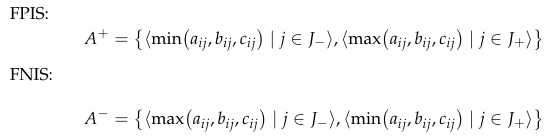

Dadas las columnas de:

J+ → criterios beneficio (`benefit_criteria`)

J− → criterios costo (`cost_criteria`)

In [ ]:
def calcular_fpis_fnis(df, benefit_criteria, cost_criteria):
    fpis = {}
    fnis = {}

    # Criterios de costo → usar min para FPIS, max para FNIS
    for col in cost_criteria:
        valores = [t for t in df[col] if isinstance(t, tuple)]
        a_vals = [t[0] for t in valores]
        b_vals = [t[1] for t in valores]
        c_vals = [t[2] for t in valores]

        fpis[col] = (min(a_vals), min(b_vals), min(c_vals))
        fnis[col] = (max(a_vals), max(b_vals), max(c_vals))

    # Criterios de beneficio → usar max para FPIS, min para FNIS
    for col in benefit_criteria:
        valores = [t for t in df[col] if isinstance(t, tuple)]
        a_vals = [t[0] for t in valores]
        b_vals = [t[1] for t in valores]
        c_vals = [t[2] for t in valores]

        fpis[col] = (max(a_vals), max(b_vals), max(c_vals))
        fnis[col] = (min(a_vals), min(b_vals), min(c_vals))

    return fpis, fnis

In [ ]:
fpis, fnis = calcular_fpis_fnis(weighted_df, benefit_criteria, cost_criteria)

In [ ]:
fpis

{'Cost_of_Living_Index': (7.0, 10.0, 14.285714285714285),
 'Average_Travel_Cost_EUR': (5.0, 7.0, 14.285714285714285),
 'Travel_Time_h': (5.0, 7.0, 14.285714285714285),
 'Adjusted_Quality_of_Life_Ranking': (35.0, 70.0, 100.0),
 'Adjusted_Adventure_Ranking': (35.0, 70.0, 100.0),
 'Adjusted_Heritage_Ranking': (35.0, 70.0, 100.0),
 'Safety_Index': (35.0, 70.0, 100.0)}

In [ ]:
fnis

{'Cost_of_Living_Index': (14.0, 33.33333333333333, 100.0),
 'Average_Travel_Cost_EUR': (10.0, 23.333333333333332, 100.0),
 'Travel_Time_h': (10.0, 23.333333333333332, 100.0),
 'Adjusted_Quality_of_Life_Ranking': (5.0, 7.0, 30.0),
 'Adjusted_Adventure_Ranking': (5.0, 7.0, 30.0),
 'Adjusted_Heritage_Ranking': (5.0, 7.0, 30.0),
 'Safety_Index': (21.0, 50.0, 70.0)}

**PASO 10:** Calcular la distancia de cada alternativa con respecto a la FPIS y FNIS.

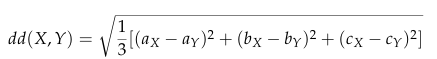

In [ ]:
def distancia_fuzzy(t1, t2):
    if isinstance(t1, tuple) and isinstance(t2, tuple):
        return (1/3) * math.sqrt(
            (t1[0] - t2[0])**2 +
            (t1[1] - t2[1])**2 +
            (t1[2] - t2[2])**2
        )
    return 0

Ahora aplicamos esto a cada alternativa:
Calculamos:

Di+ = distancia total del país i a la FPIS

Di- = distancia total del país i a la FNIS

In [ ]:
def calcular_distancias_a_ideales(df, fpis, fnis):
    distancias_pos = []
    distancias_neg = []

    for idx, row in df.iterrows():
        d_pos = 0
        d_neg = 0

        for col in df.columns[1:]:  # Omitimos 'Country'
            val = row[col]
            d_pos += distancia_fuzzy(val, fpis[col])
            d_neg += distancia_fuzzy(val, fnis[col])

        distancias_pos.append(d_pos)
        distancias_neg.append(d_neg)

    return distancias_pos, distancias_neg

In [ ]:
D_pos, D_neg = calcular_distancias_a_ideales(weighted_df, fpis, fnis)

**PASO 11:** Calcular el coeficiente de cercanía (CCI) para cada alternativa

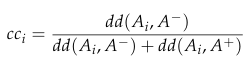

In [ ]:
def calcular_cci(D_pos, D_neg):
    return [d_neg / (d_neg + d_pos) if (d_neg + d_pos) != 0 else 0 for d_neg, d_pos in zip(D_neg, D_pos)]

In [ ]:
cci_scores = calcular_cci(D_pos, D_neg)

In [ ]:
weighted_df['CCI'] = cci_scores
weighted_df['Ranking'] = weighted_df['CCI'].rank(ascending=False).astype(int)

In [ ]:
weighted_df

,Country,Cost_of_Living_Index,Adjusted_Quality_of_Life_Ranking,Adjusted_Adventure_Ranking,Adjusted_Heritage_Ranking,Average_Travel_Cost_EUR,Travel_Time_h,Safety_Index,CCI,Ranking
0,Denmark,"(7.0, 14.285714285714285, 20.0)","(35.0, 70.0, 100.0)","(15.0, 35.0, 70.0)","(15.0, 35.0, 70.0)","(5.0, 7.0, 14.285714285714285)","(5.0, 11.666666666666666, 33.33333333333333)","(35.0, 70.0, 100.0)",0.788703,2
1,Austria,"(7.0, 16.666666666666664, 33.33333333333333)","(25.0, 49.0, 100.0)","(25.0, 49.0, 100.0)","(25.0, 49.0, 100.0)","(10.0, 23.333333333333332, 100.0)","(7.142857142857142, 14.0, 33.33333333333333)","(35.0, 70.0, 100.0)",0.683595,11
2,Ireland,"(7.0, 16.666666666666664, 33.33333333333333)","(15.0, 35.0, 70.0)","(25.0, 49.0, 100.0)","(25.0, 49.0, 100.0)","(5.0, 11.666666666666666, 33.33333333333333)","(5.0, 7.0, 14.285714285714285)","(21.0, 50.0, 70.0)",0.716219,8
3,France,"(7.0, 16.666666666666664, 33.33333333333333)","(15.0, 35.0, 70.0)","(25.0, 59.5, 100.0)","(35.0, 70.0, 100.0)","(7.142857142857142, 14.0, 33.33333333333333)","(5.0, 10.0, 20.0)","(21.0, 50.0, 70.0)",0.751953,4
4,Finland,"(7.0, 16.666666666666664, 33.33333333333333)","(35.0, 70.0, 100.0)","(15.0, 35.0, 70.0)","(5.0, 21.0, 50.0)","(5.0, 7.0, 14.285714285714285)","(5.0, 10.0, 20.0)","(35.0, 70.0, 100.0)",0.745999,5
5,The Netherlands,"(7.0, 16.666666666666664, 33.33333333333333)","(25.0, 49.0, 100.0)","(25.0, 49.0, 100.0)","(15.0, 35.0, 70.0)","(5.0, 11.666666666666666, 33.33333333333333)","(5.0, 10.0, 20.0)","(35.0, 70.0, 100.0)",0.768520,3
6,Luxembourg,"(7.0, 16.666666666666664, 33.33333333333333)","(15.0, 35.0, 70.0)","(5.0, 21.0, 50.0)","(5.0, 14.0, 50.0)","(5.0, 7.0, 14.285714285714285)","(5.0, 11.666666666666666, 33.33333333333333)","(21.0, 60.0, 100.0)",0.570776,14
7,Germany,"(7.0, 16.666666666666664, 33.33333333333333)","(25.0, 49.0, 100.0)","(5.0, 21.0, 50.0)","(25.0, 49.0, 100.0)","(5.0, 10.0, 20.0)","(7.142857142857142, 14.0, 33.33333333333333)","(21.0, 60.0, 100.0)",0.702707,10
8,United Kingdom,"(7.0, 16.666666666666664, 33.33333333333333)","(15.0, 42.0, 100.0)","(5.0, 28.0, 70.0)","(25.0, 49.0, 100.0)","(10.0, 23.333333333333332, 100.0)","(5.0, 10.0, 20.0)","(21.0, 50.0, 70.0)",0.570302,15
9,Belgium,"(7.0, 16.666666666666664, 33.33333333333333)","(25.0, 49.0, 100.0)","(15.0, 35.0, 70.0)","(5.0, 28.0, 70.0)","(7.142857142857142, 14.0, 33.33333333333333)","(5.0, 11.666666666666666, 33.33333333333333)","(21.0, 50.0, 70.0)",0.622913,13


**PASO 12:** Ordenar (rankear) las alternativas y seleccionar la alternativa con el mayor coeficiente de cercanía.

In [ ]:
# Crear un DataFrame con país, CCI y ranking
resultados = weighted_df[['Country']].copy()
resultados['CCI'] = cci_scores
resultados['Ranking'] = resultados['CCI'].rank(ascending=False).astype(int)

# Ordenar por CCI descendente
resultados_ordenado = resultados.sort_values(by='CCI', ascending=False).reset_index(drop=True)

# Seleccionar la mejor alternativa
mejor_alternativa = resultados_ordenado.iloc[0]

In [ ]:
print("🏅 Mejor alternativa según Fuzzy TOPSIS:")
display(mejor_alternativa)

🏅 Mejor alternativa según Fuzzy TOPSIS:


,0
Country,Switzerland
CCI,0.820159
Ranking,1


In [ ]:
print("Ranking de las mejores opciones según Fuzzy TOPSIS:")
display(resultados_ordenado.head(6))

Ranking de las mejores opciones según Fuzzy TOPSIS:


,Country,CCI,Ranking
0,Switzerland,0.820159,1
1,Denmark,0.788703,2
2,The Netherlands,0.768520,3
3,France,0.751953,4
4,Finland,0.745999,5
5,Portugal,0.719372,6


# Ejemplo interactivo

In [ ]:
def seleccionar_paises(df):
    print("\n📍 Lista de países disponibles:")
    for i, c in enumerate(df['Country']):
        print(f"{i+1}. {c}")

    indices = input("\n👉 Ingresa los números de 6 países separados por comas (ej: 1,3,5,7,9,12): ")
    seleccionados = [int(i.strip()) - 1 for i in indices.split(",") if i.strip().isdigit()]
    return df.iloc[seleccionados]

def ingresar_ponderaciones(criteria):
    print("\n🔧 Ingresa la ponderación lingüística (None, VL, L, M, H, VH) para cada criterio:")
    pesos = {}
    for crit in criteria:
        while True:
            val = input(f"{crit}: ").strip()
            if val in fuzzy_weights:
                pesos[crit] = fuzzy_weights[val]
                break
            else:
                print("❌ Valor no válido. Introduzca: None, VL, L, M, H, VH.")
    return pesos

# Aquí irían todas las funciones que ya hicimos:
def etiquetas_a_tripleta(etiquetas):
    """
    Convierte etiquetas lingüísticas a una lista de tripletas fuzzy, según fuzzy_ratings.
    Si hay varias etiquetas (ej. 'M & H'), se devuelve una lista con ambas tripletas.
    """
    # Si ya es una tripleta (o algo que no es string), la devolvemos tal cual
    if not isinstance(etiquetas, str):
        return etiquetas

    # Si es string, procedemos como antes
    if pd.isna(etiquetas) or etiquetas.strip() == "":
        return []

    terms = [et.strip() for et in etiquetas.split('&')]
    triplets = [fuzzy_ratings.get(et, None) for et in terms]
    triplets = [t for t in triplets if t is not None]

    return triplets

def normalizar_tripletas(df, benefit_criteria, cost_criteria):
    df_normalizado = df.copy()

    for col in benefit_criteria:
        # c* = max_i c_ij
        c_star = max([t[2] for t in df[col] if isinstance(t, tuple)])

        def normalizar_benefit(t):
            if isinstance(t, tuple):
                a, b, c = t
                return (a / c_star, b / c_star, c / c_star)
            return t

        df_normalizado[col] = df[col].apply(normalizar_benefit)

    for col in cost_criteria:
        # a- = min_i a_ij
        a_minus = min([t[0] for t in df[col] if isinstance(t, tuple)])

        def normalizar_cost(t):
            if isinstance(t, tuple) and t[0] != 0 and t[1] != 0 and t[2] != 0:
                a, b, c = t
                return (a_minus / c, a_minus / b, a_minus / a)
            return t

        df_normalizado[col] = df[col].apply(normalizar_cost)

    return df_normalizado

def ponderar_tripletas(df, weights_fuzzy):
    df_ponderado = df.copy()

    for col in df.columns[1:]:  # Omitimos 'Country'
        w = weights_fuzzy.get(col, (1, 1, 1))  # por defecto si falta

        def aplicar_peso(t):
            if isinstance(t, tuple):
                a, b, c = t
                return (a * w[0], b * w[1], c * w[2])
            return t

        df_ponderado[col] = df[col].apply(aplicar_peso)

    return df_ponderado

def calcular_fpis_fnis(df, benefit_criteria, cost_criteria):
    fpis = {}
    fnis = {}

    # Criterios de costo → usar min para FPIS, max para FNIS
    for col in cost_criteria:
        valores = [t for t in df[col] if isinstance(t, tuple)]
        a_vals = [t[0] for t in valores]
        b_vals = [t[1] for t in valores]
        c_vals = [t[2] for t in valores]

        fpis[col] = (min(a_vals), min(b_vals), min(c_vals))
        fnis[col] = (max(a_vals), max(b_vals), max(c_vals))

    # Criterios de beneficio → usar max para FPIS, min para FNIS
    for col in benefit_criteria:
        valores = [t for t in df[col] if isinstance(t, tuple)]
        a_vals = [t[0] for t in valores]
        b_vals = [t[1] for t in valores]
        c_vals = [t[2] for t in valores]

        fpis[col] = (max(a_vals), max(b_vals), max(c_vals))
        fnis[col] = (min(a_vals), min(b_vals), min(c_vals))

    return fpis, fnis

def calcular_distancias_a_ideales(df, fpis, fnis):
    distancias_pos = []
    distancias_neg = []

    for idx, row in df.iterrows():
        d_pos = 0
        d_neg = 0

        for col in df.columns[1:]:  # Omitimos 'Country'
            val = row[col]
            d_pos += distancia_fuzzy(val, fpis[col])
            d_neg += distancia_fuzzy(val, fnis[col])

        distancias_pos.append(d_pos)
        distancias_neg.append(d_neg)

    return distancias_pos, distancias_neg

def calcular_cci(D_pos, D_neg):
    return [d_neg / (d_neg + d_pos) if (d_neg + d_pos) != 0 else 0 for d_neg, d_pos in zip(D_neg, D_pos)]

def main_app():
    # Selección
    seleccionados_df = seleccionar_paises(linguistic_df)

    # Ponderaciones
    all_criteria = benefit_criteria + cost_criteria
    user_weights = ingresar_ponderaciones(all_criteria)

    # Convertir etiquetas -> tripletas
    df_tripletas = seleccionados_df.copy()
    for col in all_criteria:
        df_tripletas[col] = df_tripletas[col].apply(etiquetas_a_tripleta)

    # Normalizar
    normalized = normalizar_tripletas(df_tripletas, benefit_criteria, cost_criteria)

    # Ponderar
    weighted = ponderar_tripletas(normalized, user_weights)

    # FPIS y FNIS
    fpis, fnis = calcular_fpis_fnis(weighted, benefit_criteria, cost_criteria)

    # Distancias
    D_pos, D_neg = calcular_distancias_a_ideales(weighted, fpis, fnis)

    # CCI y Ranking
    cci_scores = calcular_cci(D_pos, D_neg)
    resultado = weighted[['Country']].copy()
    resultado['CCI'] = cci_scores
    resultado['Ranking'] = resultado['CCI'].rank(ascending=False).astype(int)
    resultado_ordenado = resultado.sort_values(by='CCI', ascending=False)

    # Resultado final
    print("\n🏁 Resultado final del ranking TOPSIS difuso:\n")
    print(resultado_ordenado.to_string(index=False))

# Ejecutar app
main_app()


📍 Lista de países disponibles:
1. Denmark
2. Austria
3. Ireland
4. France
5. Finland
6. The Netherlands
7. Luxembourg
8. Germany
9. United Kingdom
10. Belgium
11. Sweden
12. Italy
13. Cyprus
14. Estonia
15. Slovenia
16. Latvia
17. Spain
18. Lithuania
19. Slovakia
20. Croatia
21. Portugal
22. Hungary
23. Poland
24. Bulgaria
25. Romania
26. Switzerland
